In [1]:
import scarches as sca
import numpy as np
import gdown
import scanpy as sc
import torch
import pandas as pd
import dtale


In [35]:
data = pd.read_csv("uncorr_latent.csv")
latent_data = data.iloc[:, :-3].values

In [36]:
dtale.show(data)

In [37]:
labels = data['DIAB'].values

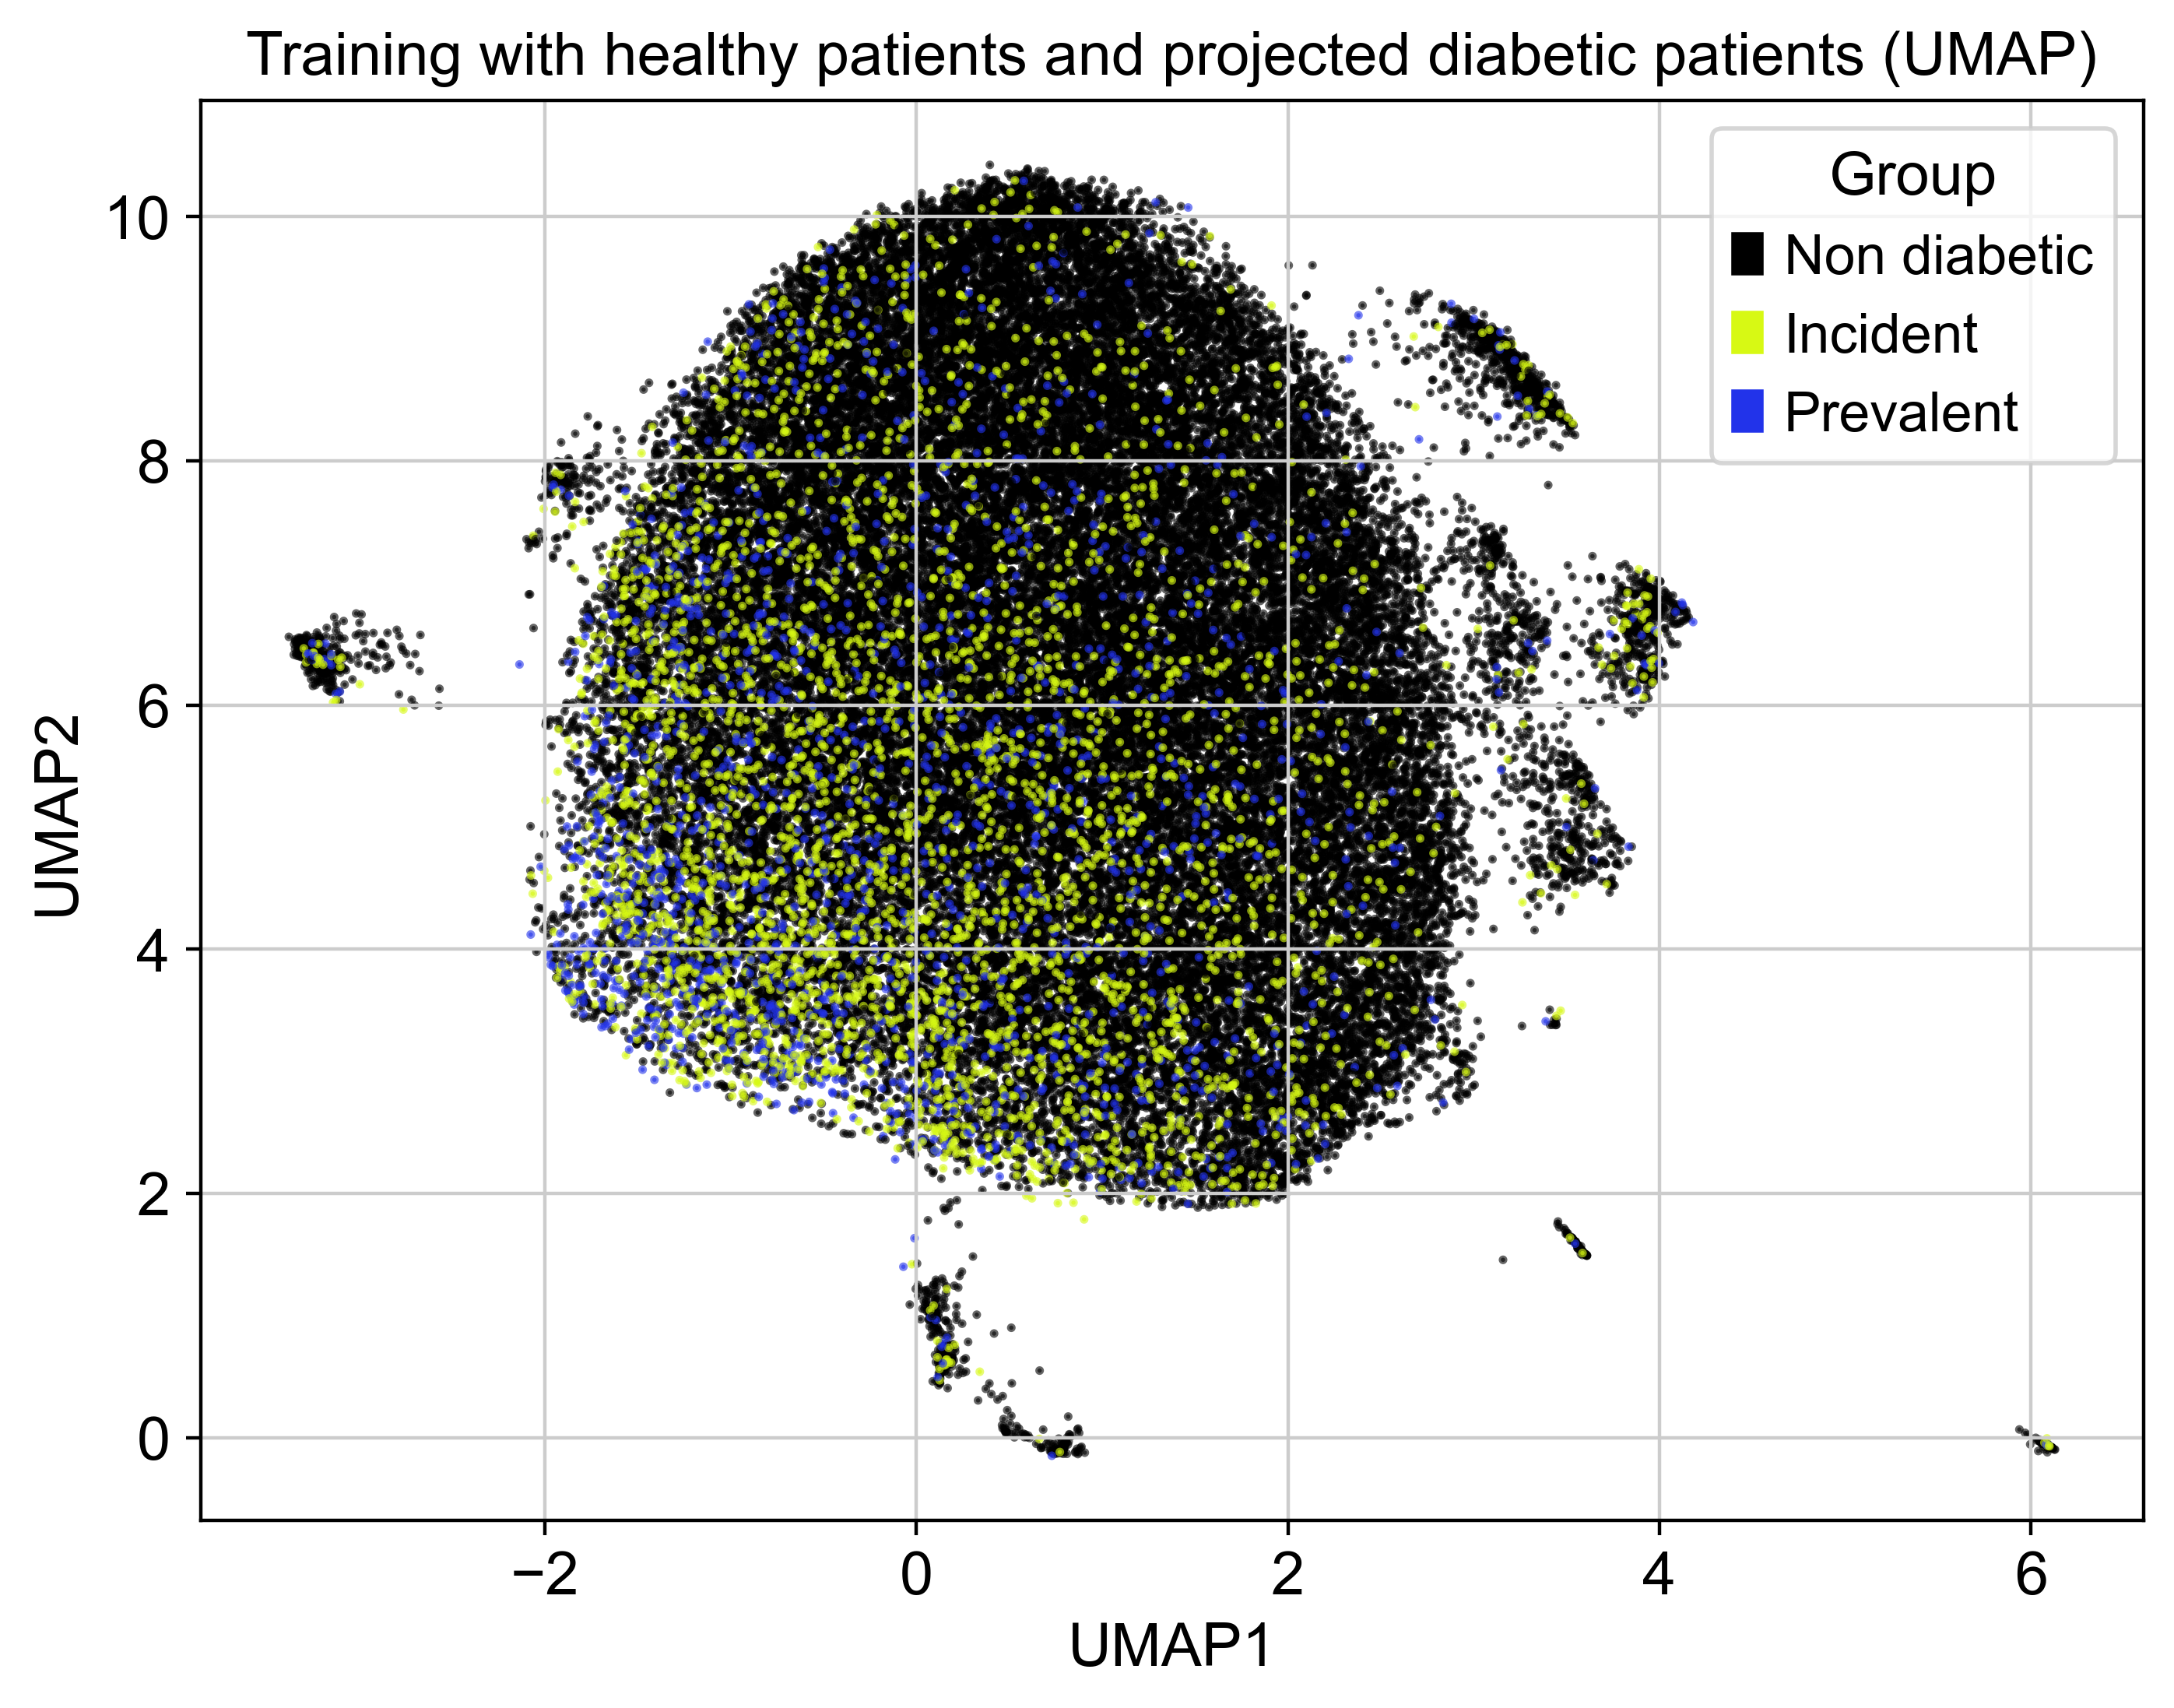

In [38]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_data)

import matplotlib.pyplot as plt

label_map = {'Non diabetic': 0, 'Incident': 1, 'Prevalent': 2}
label_numeric = np.vectorize(label_map.get)(labels)

# Palette Okabe-Ito (colorblind-friendly)
colors = np.array(['#000000', "#D7F914", "#2233EA"])  # 

# Ottieni il colore corrispondente a ogni punto
label_colors = colors[label_numeric]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, alpha=0.6, c=label_colors)
plt.title("Training with healthy patients and projected diabetic patients (UMAP)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

# Crea la legenda con i colori corretti
handles = [mpatches.Patch(color=colors[i], label=label) for label, i in label_map.items()]
plt.legend(handles=handles, title="Group")
plt.show()